<img src="https://upload.wikimedia.org/wikipedia/commons/d/de/Logotipo_Ikiam.png" width=300 height=240 />
<font color='red'> </font>

# EXAMEN PARCIAL PYTHON
    

## GBI6-2022II: BIOINFORMÁTICA

**Campos Chimbo, Micaela Nicol** <font color='red'>CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS</font>

**01-02-2022**

### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```coati.py``` donde tendrá dos funciones:

2. Archivo ```2022II_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Escriba una <font color='red'>**tabla**</font> con las características de su computador 


In [2]:
# Características de la computador

## Nombre del equipo:  DESKTOP-02N9SVN

-Procesador: Intel(R)Core(TM)i5-6300U CPU 
@2.40GHz 2.50ghz

-RAM instalada:8,00GB(7,88 GB usable)

-Edicion: Windows 10 Pro

-Version: 22H2


In [13]:
rnames =["Edicion: Windows 10 Pro", "RAM instalada:8,00GB(7,88 GB usable)", "Version: 22H2", "Procesador: Intel(R)Core(TM)i5-6300U CPU 
@2.40GHz 2.50ghz", ""]
cnames = ["long_pata"]
df1 = pd.DataFrame(lista, rnames, cnames)
df1

SyntaxError: EOL while scanning string literal (2084838149.py, line 1)

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt # graficos 
import seaborn as sns # estadistica y visualizacion
#!pip install pandas

## Ejercicio 1 [1.5 puntos]
Inserte la captura de pantalla del curso [PANDAS](https://www.kaggle.com/learn/pandas) de Kaggle (Certificado y evidencia de avance de la página de Kaggle)

## Ejercicio 2 [1.5 puntos]
Inserte la captura de pantalla del curso [VISUALIZACIÓN](https://www.kaggle.com/learn/data-visualization) de Kaggle (Certificado y evidencia de avance de la página de Kaggle)
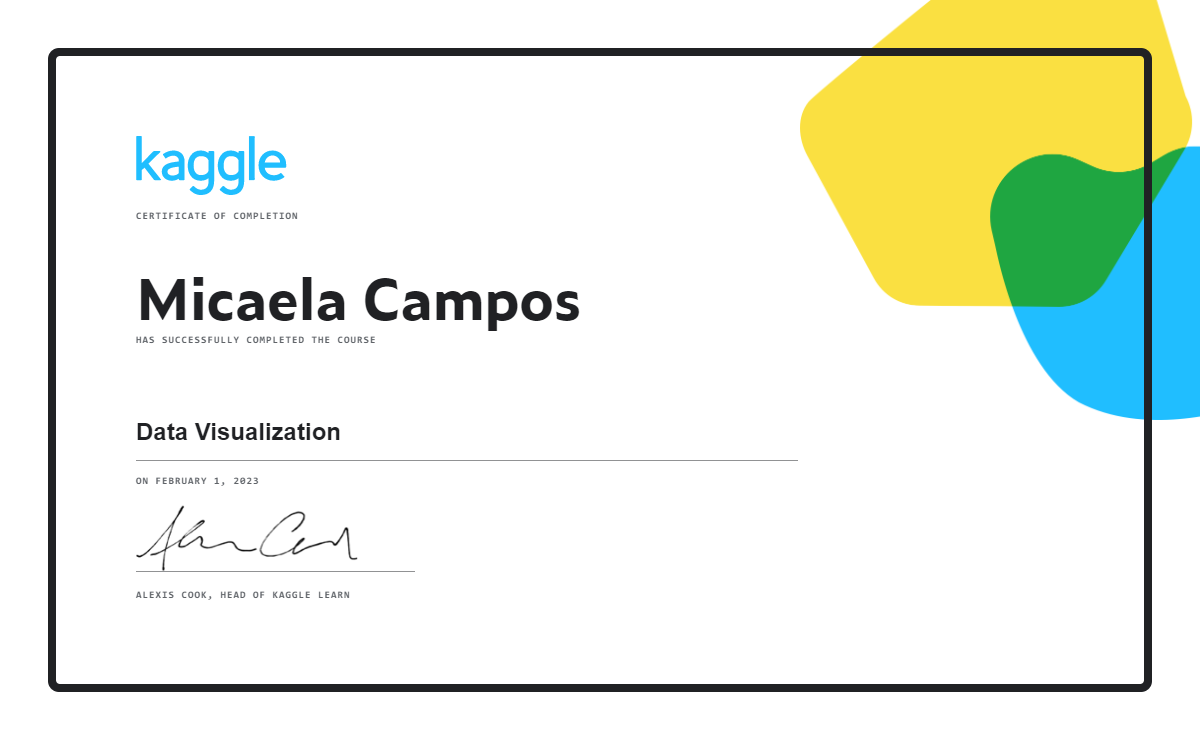

## Ejercicio 3 [3 puntos]

En su carpeta de examen tiene el documento ```id_coati.txt``` donde se encuentran los identificadores de accesión que debe usar para descargar información. 
Cree el módulo ```coati.py``` con las siguientes tres **funciones** y sus respectivos **docstring** :
    
i. ```fasta_downloader```: para cargar ```id_coati.txt``` en ```id_coati```y descargar en **formato genbank** la información correspondiente a los identificadores de accesión usando el **ENTREZ** de Biopythony se guardar en ```coati``` y en ```coati.gb```. 

ii. ```alignment```: para que el algoritmo extraiga **solamente las secuencias** de la variable ```coati``` y realice un alineamiento usando clustalW. El resultado debe ser ```coati.aln``` y ```coati.dnd``` que deben guardarse en su carpeta de trabajo.  

iii ```tree```: para que realice el cálculo de las distancias utilizando ```coati.aln``` y finalmente que imprima en la pantalla el árbol filogenético y guarde en su carpeta de trabajo el arbol como ```coati_phylotree.pdf```

iv. Cargue el módulo ```coati``` e **imprima docstring de cada función**.


In [1]:
# Escriba aquí su código para el ejercicio 3












## Ejercicio 4 [1.5 puntos]

Escriba una o dos líneas de código para usar las funciones ```fasta_downloader```, ```alignment``` y ```tree```: 

i. Descargue la data en ```coati``` y guarde como ```coati.gdb```.  

ii. Alinee las secuencias de ```coati``` y obtenga ```coati.aln``` y ```coati.dnd```.

iii. Construya e **interprete** el arbol filogenético y guarde en ```coati_phylotree.pdf```.

In [2]:
# Escriba aquí su código para el ejercicio 4



## Ejercicio 5 [1.5 puntos]

Con las secuencias de ADN de ```coati```, realice lo siguiente: 

i. la traducción y cálculo del peso molecular (**molecular_weight**) y el índice de estabilidad (**instability_index**) de los péptidos resultantes. 

ii. una gráfica tipo [joinplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) utilizando los parámetros de peso molecular e índice de estabilidad. Edite color, tamaño y tipo de puntos, asimismo etiquete adecuadamente el título y los ejes.

iii. guarde la figura como ```coati.png``` con una resolución de 300dpi.

iv. interprete la figura resultante

In [4]:
# Escriba aquí su código para el ejercicio 5

















## Ejercicio 6 [0.5 puntos]


1. Cree un archivo ```Readme.md``` que debe tener lo siguiente:
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

2. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
3. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
